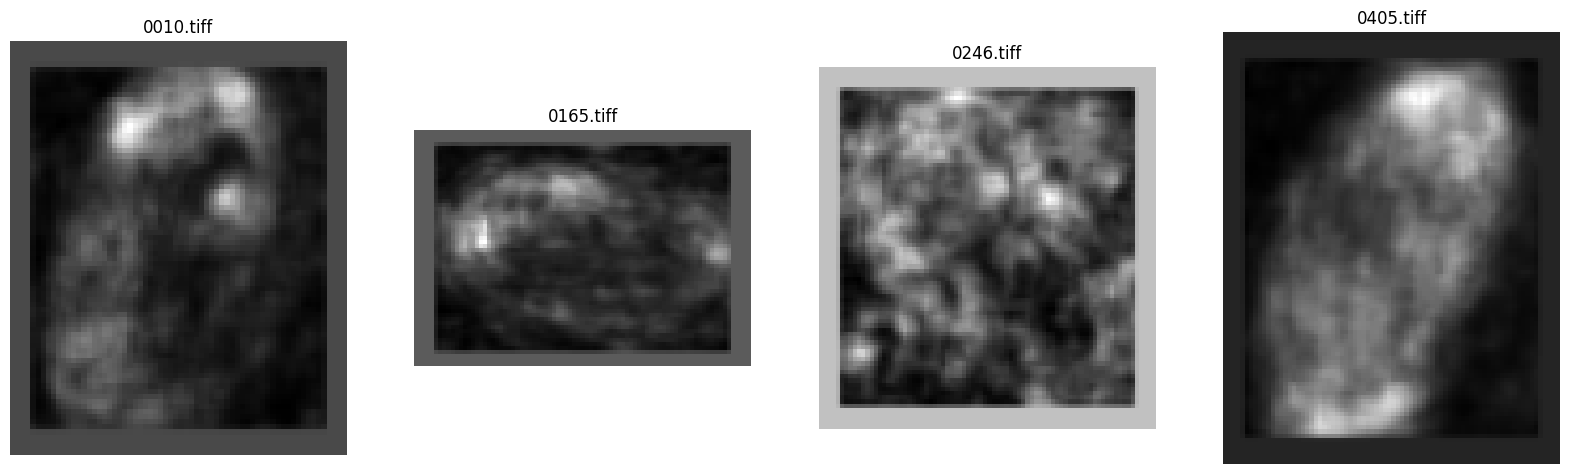

In [1]:
from pyometiff import OMETIFFReader
import pathlib

import os

cls = "bean"
img= "0001"

test = os.listdir(f'output/1/anomaly_maps/mvtec_ad/{cls}/test/tear')
    
image_set = []
for i in test:
    rev_path = f'output/1/anomaly_maps/mvtec_ad/{cls}/test/tear/{i}'
    img_fpath = pathlib.Path(rev_path)
    reader = OMETIFFReader(img_fpath)
    img_arr, meta, xml = reader.read()
    image_set.append(img_arr)
import matplotlib.pyplot as plt
import cv2

fig, ax = plt.subplots(1, 4, figsize=(20, 20))

for i in range(4):
    ax[i].imshow(image_set[i], cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(test[i])

plt.savefig('test.png')
plt.show()

# img_true_set = []
# for i in image_set:
#     img_true_set.append(cv2.cvtColor(i, cv2.COLOR_GRAY2BGR))



(71, 64)


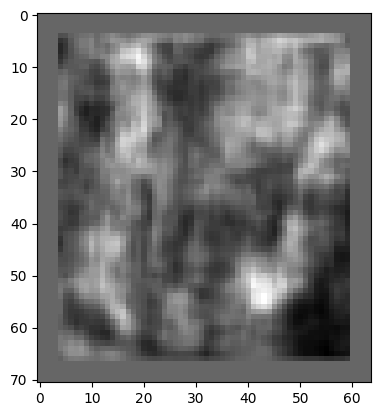

In [2]:
import matplotlib.pyplot as plt
import cv2
plt.imshow(img_arr, cmap='gray')
img_true = cv2.cvtColor(img_arr, cv2.COLOR_GRAY2BGR)
print(img_arr.shape)

In [3]:
len(test)

666

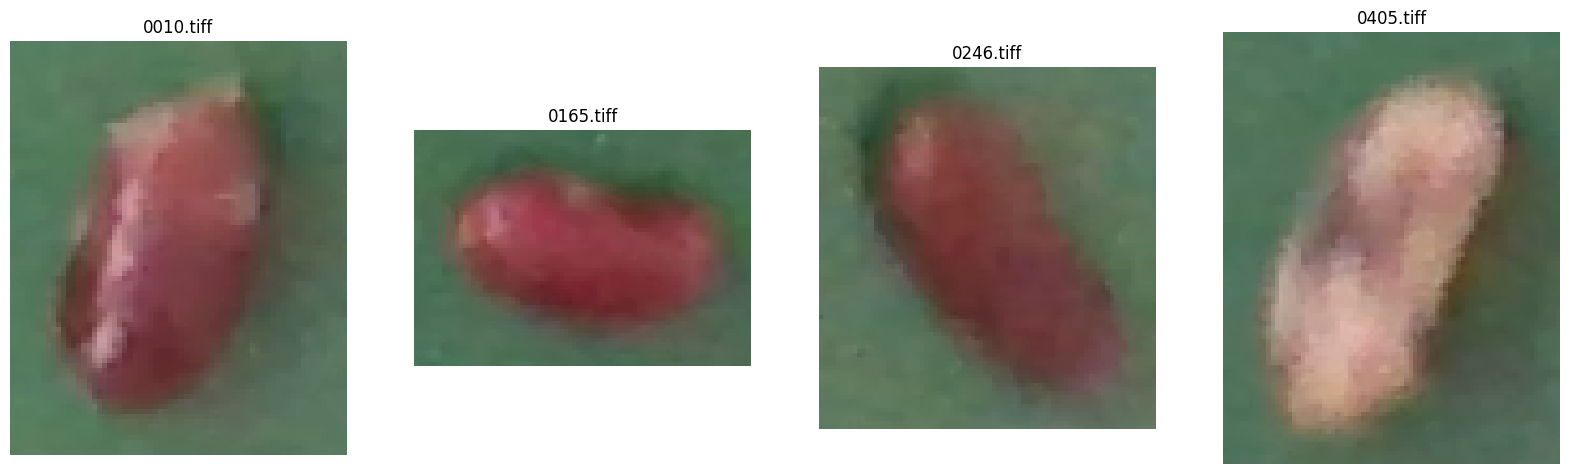

In [4]:
import re
def find_num(x):
    return x[:-5]
image_set = []
for i in test:
    pathz = f'../patchcore-inspection/mvtec_anomaly_detection/{cls}/test/tear/{find_num(i)}.png'
    imgz = cv2.imread(pathz)
    imgz = cv2.cvtColor(imgz, cv2.COLOR_BGR2RGB)
    image_set.append(imgz)

fig, ax = plt.subplots(1, 4, figsize=(20, 20))

for i in range(4):
    ax[i].imshow(image_set[i])
    ax[i].axis('off')
    ax[i].set_title(test[i])

plt.savefig("true.png")
plt.show()


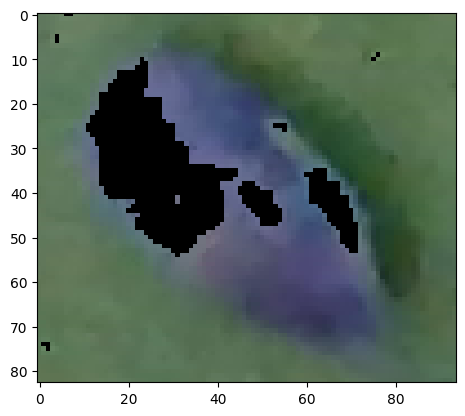

In [5]:
import cv2
import numpy as np

# Đường dẫn đến ảnh đầu vào
input_image_path = f"../patchcore-inspection/mvtec_anomaly_detection/{cls}/test/tear/{img}.png"

# Đọc ảnh đầu vào sử dụng OpenCV
input_image = cv2.imread(input_image_path)

# Chuyển ảnh sang độ xám (grayscale)
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Tạo một ảnh người dùng mask để chỉ giữ lại những vùng màu trắng và xám
mask = cv2.inRange(gray_image, 0, 120)  # 128 là ngưỡng cho màu xám (có thể điều chỉnh)
result_image = cv2.bitwise_and(input_image, input_image, mask=mask)

# Chuyển những vùng trắng và xám thành màu đen
result_image[mask == 0] = [0, 0, 0]

plt.imshow(result_image)


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


path = f"../patchcore-inspection/mvtec_anomaly_detection/{cls}/"
path_save = f"../patchcore-inspection/mvtec_anomaly_detection/{cls}"
for i in tqdm(test):
    # print(i)
    # print(find_num(i))
    input_image_path = f"{path}test/tear/{find_num(i)}.png"
    # print(input_image_path)
    input_image = cv2.imread(input_image_path)
    gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    mask = cv2.inRange(gray_image, 0, 150)  # 0 là ngưỡng cho màu đen
    # print(mask)
    # trun map values 255->0, 0-> 255
    mask = cv2.bitwise_not(mask)
    black_image = np.zeros_like(input_image)

    result_image = black_image.copy()
    result_image[mask != 0] = input_image[mask != 0]

    # fig = plt.figure()
    # plt.imshow(mask, cmap='gray')
    # fig.gca().imshow(mask, cmap='gray')
    # fig.show()

    import os
    if not os.path.exists(f"{path_save}/ground_truth/tear"):
        os.makedirs(f"{path_save}/ground_truth/tear")
    import cv2
    assert mask.shape == input_image.shape[:2]
    cv2.imwrite(f"{path_save}/ground_truth/tear/{find_num(i)}_mask.png", mask)
    # plt.savefig(f"../patchcore-inspection/mvtec_anomaly_detection/bean/ground_truth/tear/{find_num(i)}_mask.jpg"
    # , facecolor=fig.get_facecolor(), edgecolor='none')
    # print("Path data saved: ", f"{path_save}/ground_truth/tear/{find_num(i)}.jpg")


100%|██████████| 666/666 [00:00<00:00, 3387.51it/s]


In [7]:
fig.savefig('random points.png', facecolor=fig.get_facecolor())